In [ ]:
'''
Data 201
Group Project: Aminata Diatta, Annet Isa, Betty Liu, Joshua Shleifer.
Project 1
'''

'\nData 201\nGroup Project: Aminata Diatta, Annet Isa, Betty Liu, Joshua Shleifer.\nProject 1\n'

**INTRODUCTION**

From the Crash Reporting - Incidents Data page from the Montgomery County data website:

"This dataset provides general information about each collision and details of all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police."


https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf/about_data

On October 23, 2024, the day we first pulled the CSV, the data consisted of 114k rows, 37 columns. Preliminary questions included:  

*   How does the time of day effect injury rate?
*   How does road quality affect crash rates/injury rates?





The original CSV was too large to upload to Git. Find the original CSV here: https://drive.google.com/file/d/1zDNac3P0dwky56TI93l_AyZ5CxWj3Xrx/view?usp=sharing

After importing pandas and reading in the CV, I created additional columns from the date/time crash column (year, month, day, hour, minute) and created 3 further dataframes:

super_clean_df: has removed NAs for 'Surface Condition' AND 'Road Condition'

road_clean_df: removed NAs for 'Road Condition'

surface_clean_df: removed NAs for 'Surface Condition'
(annet)

In [ ]:
import pandas as pd

df=pd.read_csv("Crash_Reporting_-_Incidents_Data_20241024.csv")

<ipython-input-8-119e2f6742fa>:3: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Crash_Reporting_-_Incidents_Data_20241024.csv")


# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105724 entries, 0 to 105723
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Report Number                 105724 non-null  object 
 1   Local Case Number             105724 non-null  object 
 2   Agency Name                   105724 non-null  object 
 3   ACRS Report Type              105724 non-null  object 
 4   Crash Date/Time               105724 non-null  object 
 5   Hit/Run                       104199 non-null  object 
 6   Route Type                    91734 non-null   object 
 7   Lane Direction                92382 non-null   object 
 8   Lane Type                     16780 non-null   object 
 9   Number of Lanes               93384 non-null   object 
 10  Direction                     92391 non-null   object 
 11  Distance                      94254 non-null   float64
 12  Distance Unit                 93396 non-null

In [ ]:
df['date'] = pd.to_datetime(df['Crash Date/Time'])

display(df.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,date
0,MCP1123002M,190010046,Montgomery County Police,Injury Crash,03/04/2019 08:41:00 AM,No,Maryland (State),West,NaN,2,...,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.113113,-77.057592,"(39.11311333, -77.05759167)",2019-03-04 08:41:00
1,MCP21610009,16028039,Montgomery County Police,Property Damage Crash,06/04/2016 07:14:00 PM,Yes,County,East,NaN,1,...,OTHER VEHICLE,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",38.982443,-77.079235,"(38.98244333, -77.079235)",2016-06-04 19:14:00
2,MCP2790000P,15041420,MONTGOMERY,Property Damage Crash,08/18/2015 11:00:00 PM,No,County,South,NaN,2,...,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.189845,-77.230325,"(39.189845, -77.230325)",2015-08-18 23:00:00
3,MCP3378000J,230051006,Montgomery County Police,Injury Crash,08/24/2023 07:46:00 AM,No,Maryland (State),West,NaN,4,...,NaN,NON INTERSECTION,NaN,CURVE LEFT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.041698,-77.050125,"(39.04169833, -77.050125)",2023-08-24 07:46:00
4,DD5659000H,230049130,Rockville Police Departme,Property Damage Crash,08/12/2023 04:28:00 PM,Yes,NaN,South,NaN,3,...,OTHER VEHICLE,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.084720,-77.148200,"(39.08472, -77.1482)",2023-08-12 16:28:00


In [ ]:
# create new columns for month, day, year, hour, and minute
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

# preview the DataFrame to see the new columns
display(df[['date', 'month', 'day', 'year', 'hour', 'minute']].head())

,date,month,day,year,hour,minute
0,2019-03-04 08:41:00,3,4,2019,8,41
1,2016-06-04 19:14:00,6,4,2016,19,14
2,2015-08-18 23:00:00,8,18,2015,23,0
3,2023-08-24 07:46:00,8,24,2023,7,46
4,2023-08-12 16:28:00,8,12,2023,16,28


In [ ]:
# Print all the column names of the dataframe
print(list(df.columns))

['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction', 'Lane Type', 'Number of Lanes', 'Direction', 'Distance', 'Distance Unit', 'Road Grade', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'First Harmful Event', 'Second Harmful Event', 'Junction', 'Intersection Type', 'Road Alignment', 'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Location', 'date', 'month', 'day', 'year', 'hour', 'minute']


In [ ]:
# Create a list of the columns to convert to category
# If we will use the answers as frequency counts, the column needs to be a category
categorical_columns = ['Agency Name', 'ACRS Report Type', 'Hit/Run', 'Route Type', 'Lane Direction', 'Lane Type', 'Number of Lanes', 'Direction', 'Distance Unit', 'Road Grade', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'First Harmful Event', 'Second Harmful Event', 'Junction', 'Intersection Type', 'Road Alignment', 'Road Condition', 'Road Division']

# Loop through the list of columns and convert each to category
for col in categorical_columns:
  df[col] = df[col].astype('category')

In [ ]:
# Confirmation the column-typing worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105724 entries, 0 to 105723
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Report Number                 105724 non-null  object        
 1   Local Case Number             105724 non-null  object        
 2   Agency Name                   105724 non-null  category      
 3   ACRS Report Type              105724 non-null  category      
 4   Crash Date/Time               105724 non-null  object        
 5   Hit/Run                       104199 non-null  category      
 6   Route Type                    91734 non-null   category      
 7   Lane Direction                92382 non-null   category      
 8   Lane Type                     16780 non-null   category      
 9   Number of Lanes               93384 non-null   category      
 10  Direction                     92391 non-null   category      
 11  Distance     

In [ ]:
# Summary stats
df.describe()

,Distance,Latitude,Longitude,date,month,day,year,hour,minute
count,94254.000000,105724.000000,105724.000000,105724,105724.000000,105724.000000,105724.000000,105724.000000,105724.000000
mean,58.719724,39.084412,-77.114299,2019-09-23 01:26:48.382392064,6.608925,15.677661,2019.218210,13.186561,27.707588
min,0.000000,37.720000,-79.486000,2015-01-01 00:30:00,1.000000,1.000000,2015.000000,0.000000,0.000000
25%,0.000000,39.025868,-77.191847,2017-04-02 14:16:30,4.000000,8.000000,2017.000000,9.000000,13.000000
50%,0.100000,39.076046,-77.107586,2019-06-19 03:37:00,7.000000,16.000000,2019.000000,14.000000,29.000000
75%,50.000000,39.140868,-77.040462,2022-04-16 02:38:15,10.000000,23.000000,2022.000000,17.000000,43.000000
max,10078.320000,39.990414,-75.527708,2024-10-16 16:00:00,12.000000,31.000000,2024.000000,23.000000,59.000000
std,138.407206,0.072777,0.099422,NaN,3.440480,8.773691,2.856294,5.515456,17.699400


In [ ]:
# Number of missing observations
df.isnull().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Hit/Run,1525
Route Type,13990
Lane Direction,13342
Lane Type,88944
Number of Lanes,12340


In [ ]:
# Loop through each column and check if it's a category, then print its frequency counts
for col in df.columns:
    if df[col].dtype.name == 'category':  # Check if the column is of category type
        print(f"Frequencies for {col}:")
        print(df[col].value_counts())  # Get the frequency count of each category in the column
        print("\n")  # Print a new line for better readability

Frequencies for Agency Name:
Agency Name
Montgomery County Police     78093
MONTGOMERY                   12906
Rockville Police Departme     5621
Gaithersburg Police Depar     4491
Takoma Park Police Depart     1783
ROCKVILLE                      933
Maryland-National Capital      797
GAITHERSBURG                   752
TAKOMA                         235
MCPARK                         113
Name: count, dtype: int64


Frequencies for ACRS Report Type:
ACRS Report Type
Property Damage Crash    69425
Injury Crash             35970
Fatal Crash                329
Name: count, dtype: int64


Frequencies for Hit/Run:
Hit/Run
No     86016
Yes    18183
Name: count, dtype: int64


Frequencies for Route Type:
Route Type
Maryland (State)          39122
County                    32679
Municipality               5778
US (State)                 4058
County Route               2970
Maryland (State) Route     2530
Interstate (State)         1742
Other Public Roadway        776
Municipality Route         

In [ ]:
columns_to_check = ['Surface Condition', 'Road Condition']

In [ ]:
super_clean_df = df.dropna(subset=['Surface Condition', 'Road Condition'])

# Calculate the sum of missing values for the specified columns
missing_values_sum_super = super_clean_df[columns_to_check].isna().sum()

# Print the sum of missing values for each column
print(missing_values_sum_super)

Surface Condition    0
Road Condition       0
dtype: int64


In [ ]:
road_clean_df = df.dropna(subset=['Road Condition'])

# Calculate the sum of missing values for the specified columns
missing_values_sum_road = road_clean_df[columns_to_check].isna().sum()

# Print the sum of missing values for each column
print(missing_values_sum_road)

Surface Condition    1997
Road Condition          0
dtype: int64


In [ ]:
surface_clean_df = df.dropna(subset=['Surface Condition'])

# Calculate the sum of missing values for the specified columns
missing_values_sum_surface = surface_clean_df[columns_to_check].isna().sum()

# Print the sum of missing values for each column
print(missing_values_sum_surface)

Surface Condition       0
Road Condition       8055
dtype: int64


# visualization

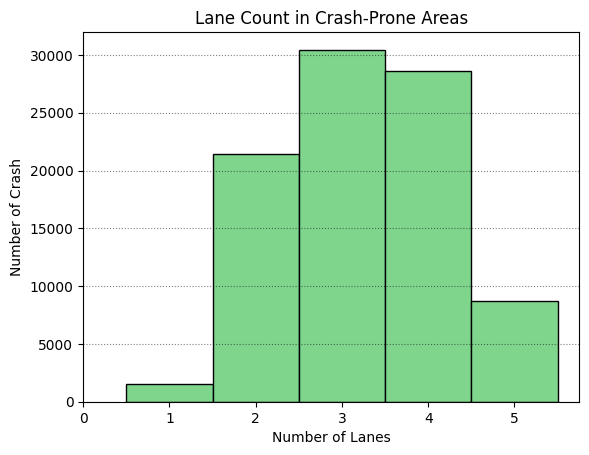

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Number of Lanes' to numeric, errors='coerce' will convert non-numeric values to NaN
df['Number of Lanes'] = pd.to_numeric(df['Number of Lanes'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['Number of Lanes'])

# Histogram for the Number of Lanes
plt.hist(df['Number of Lanes'], bins=range(0, 6), edgecolor='#000000', align='right', color='#80d58c')
plt.xlabel('Number of Lanes')
plt.ylabel('Number of Crash')
plt.title('Lane Count in Crash-Prone Areas')

#x-ticks to cover the range of lane
plt.xticks(range(0, 6))

# Add horizontal grid lines
plt.grid(axis='y', linestyle=':', alpha=0.5, color='black')
plt.show()


In the histogram above, roads with 3 to 4 lanes appear to have the highest number of incidents, possibly due to the increased traffic and complexity of navigating multiple lanes, making it easier for crashes to occur. Conversely, 1-lane roads show the fewest incidents, likely due to the simpler layout and lower traffic volume, making it harder to crash.

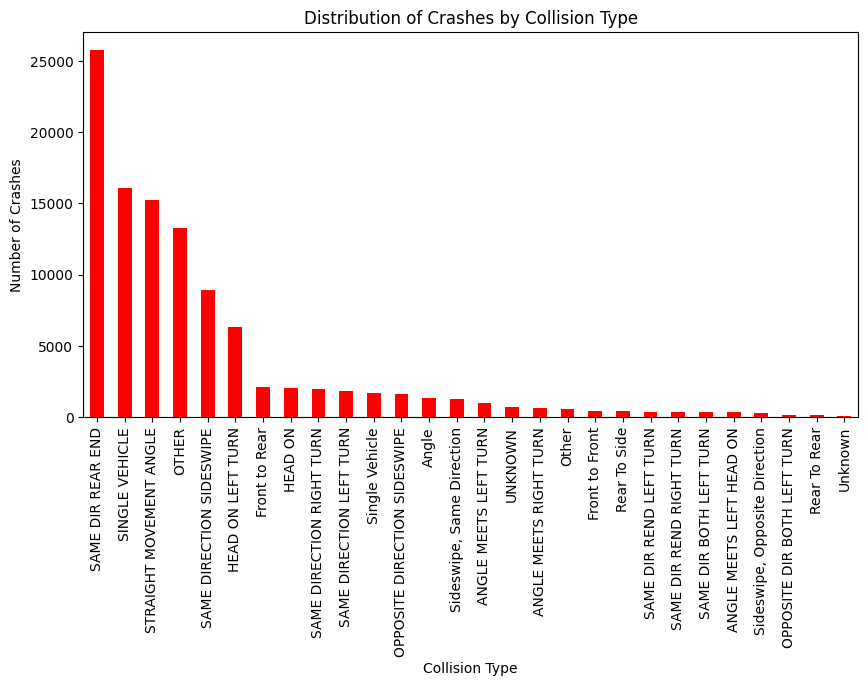

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['Collision Type'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Crashes by Collision Type')
plt.xlabel('Collision Type')
plt.ylabel('Number of Crashes')
plt.show()

##comments:


Half of the accidents in Maryland involve three main types of collisions: "same direction rear ends," "single vehicle," and "straight movement angle."

"Same direction rear end" collisions happen when a car hits the back of the vehicle in front of it. These crashes are commonly caused by distracted driving, such as texting, eating, or talking with passengers. In many cases, drivers may not have enough time to stop if the vehicle ahead stops suddenly. Poor road conditions, such as rain, ice, or even loose gravel, can also make it harder for drivers to stop in time, increasing the risk of rear-end collisions.
"Single vehicle" accidents involve only one car, often due to driver mistakes or misjudgments. These accidents are sometimes the result of overcorrecting the steering or losing control on curves. In Maryland, young drivers as young as 16 can drive alone, which may add to the risks on the road. Inexperienced drivers may get distracted when they’re with friends, become overconfident, or sometimes even take risks like speeding or driving after drinking. These factors can contribute to the higher rate of single-vehicle accidents.
Lastly, "straight movement angle" collisions often occur at intersections, where two vehicles collide at an angle. These accidents can happen when a driver misjudges the speed or distance of an oncoming car, fails to yield, or is in too much of a rush to wait. Poor visibility at intersections can also lead to these accidents, especially at night or in bad weather. Addressing these types of crashes in Maryland might include better driver education, stricter rules for young drivers, and improvements to intersection visibility and signage.


   year  median_estimate            ci
0  2015          13.9170  [13.0, 14.0]
1  2016          13.9820  [13.0, 14.0]
2  2017          13.2645  [13.0, 14.0]
3  2018          13.5645  [13.0, 14.0]
4  2019          13.8970  [13.0, 14.0]
5  2020          14.1150  [14.0, 15.0]
6  2021          14.0255  [13.0, 15.0]
7  2022          13.9600  [13.0, 14.0]
8  2023          14.1010  [14.0, 15.0]
9  2024          14.3950  [14.0, 15.0]


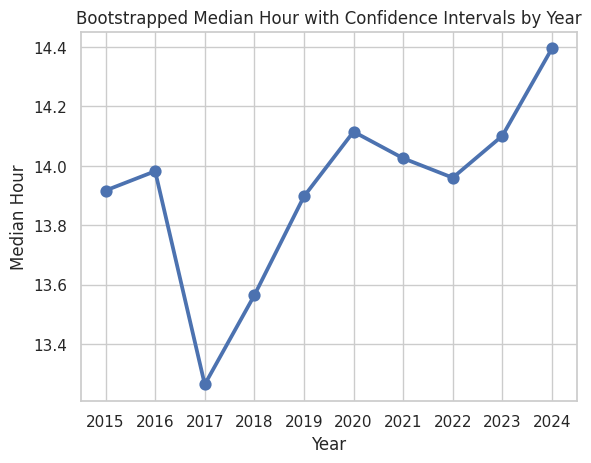

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def bootstrap_median(data, n_bootstraps=1000):
    medians = []
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(sample))
    return np.mean(medians), np.percentile(medians, [2.5, 97.5])

# Bootstrap
sample = df.sample(frac=0.1, random_state=42)
bootstrap_results = sample.groupby('year')['hour'].apply(lambda x: bootstrap_median(x))
bootstrap_df = pd.DataFrame(bootstrap_results.tolist(), index=bootstrap_results.index, columns=['median_estimate', 'ci'])

bootstrap_df.reset_index(inplace=True)
print(bootstrap_df)

sns.pointplot(bootstrap_df, x='year', y='median_estimate', color='b')
plt.xlabel('Year')
plt.ylabel('Median Hour')
plt.title('Bootstrapped Median Hour with Confidence Intervals by Year')
plt.grid(True)
plt.show()

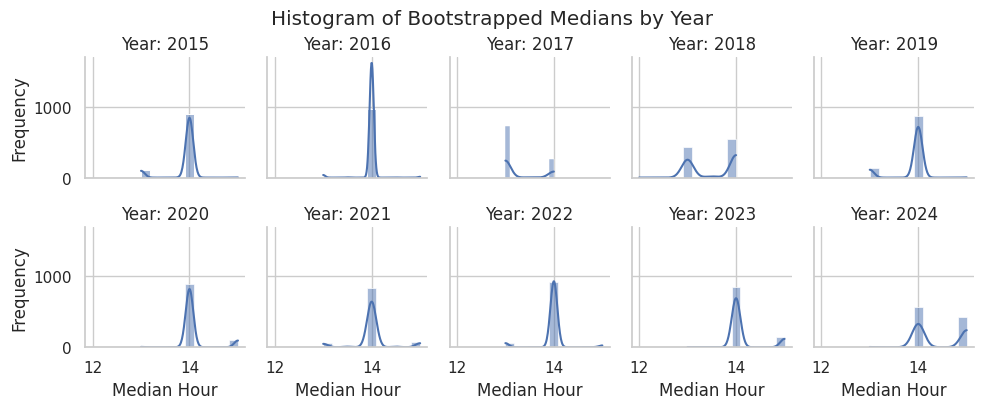

In [ ]:
from scipy.stats import bootstrap


def bootstrap_medians(data):
    res = bootstrap((data,), np.median, confidence_level=0.95, n_resamples=1000, method='percentile')
    return res.bootstrap_distribution


# Bootstrap grouped by year of hour of crash
sample = df.sample(frac=0.1, random_state=42)
bootstrapMedians = sample.groupby('year')['hour'].apply(bootstrap_medians).explode().reset_index()
bootstrapMedians.rename(columns={'hour': 'median'}, inplace=True)

# Plot faceted histograms
g = sns.FacetGrid(bootstrapMedians, col="year", col_wrap=5, height=2, sharex=True, sharey=True)
g.map(sns.histplot, "median", kde=True)
g.set_titles("Year: {col_name}")
g.set_axis_labels("Median Hour", "Frequency")
plt.suptitle("Histogram of Bootstrapped Medians by Year", y=1.02)
plt.tight_layout()
plt.show()